In [1]:
import os

import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing, sklearn.decomposition, sklearn.svm
import librosa
import librosa.display

import utils
plt.rcParams['figure.figsize'] = (13, 5)

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.preprocessing import label_binarize

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
tracks = utils.load('data/fma_metadata/tracks.csv')

tracks.shape

(106574, 52)

In [3]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   (album, comments)            106574 non-null  int64         
 1   (album, date_created)        103045 non-null  datetime64[ns]
 2   (album, date_released)       70294 non-null   datetime64[ns]
 3   (album, engineer)            15295 non-null   object        
 4   (album, favorites)           106574 non-null  int64         
 5   (album, id)                  106574 non-null  int64         
 6   (album, information)         83149 non-null   category      
 7   (album, listens)             106574 non-null  int64         
 8   (album, producer)            18060 non-null   object        
 9   (album, tags)                106574 non-null  object        
 10  (album, title)               105549 non-null  object        
 11  (album, tracks)           

In [4]:
df=tracks[[('track', 'comments'),('track', 'favorites'),('track', 'interest'),('track', 'listens'),('set', 'subset')]]

In [5]:
df

track                                set
         comments favorites interest listens  subset
track_id                                            
2               0         2     4656    1293   small
3               0         1     1470     514  medium
5               0         6     1933    1151   small
10              0       178    54881   50135   small
20              0         0      978     361   large
...           ...       ...      ...     ...     ...
155316          0         1      122     102   large
155317          0         1      194     165   large
155318          0         2      214     168   large
155319          0         0      336     294   large
155320          0         1      972     705   large

[106574 rows x 5 columns]

In [6]:
df=df.loc[df[('set', 'subset')]!='large']

In [7]:
df

track                                set
         comments favorites interest listens  subset
track_id                                            
2               0         2     4656    1293   small
3               0         1     1470     514  medium
5               0         6     1933    1151   small
10              0       178    54881   50135   small
134             0         3     1126     943  medium
...           ...       ...      ...     ...     ...
155297          0         3     1463    1049  medium
155298          0         0      706     590  medium
155306          0         1      497     435  medium
155307          0         0      630     571  medium
155314          0         0      778     652  medium

[25000 rows x 5 columns]

In [8]:
df=df.drop([('set', 'subset')], axis = 1)

C:\Users\Federico\AppData\Local\Temp/ipykernel_3060/2363412859.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5]),
 [Text(0.5, 0, 'track-comments'),
  Text(1.5, 0, 'track-favorites'),
  Text(2.5, 0, 'track-interest'),
  Text(3.5, 0, 'track-listens')])

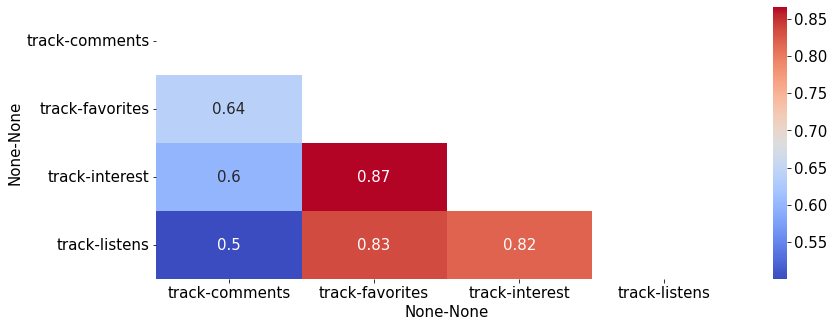

In [9]:
SMALL_SIZE = 15
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=0)

In [10]:
df=df.drop([('track', 'comments'),('track', 'interest')], axis = 1)

In [11]:
df

track        
         favorites listens
track_id                  
2                2    1293
3                1     514
5                6    1151
10             178   50135
134              3     943
...            ...     ...
155297           3    1049
155298           0     590
155306           1     435
155307           0     571
155314           0     652

[25000 rows x 2 columns]

<function matplotlib.pyplot.show(close=None, block=None)>

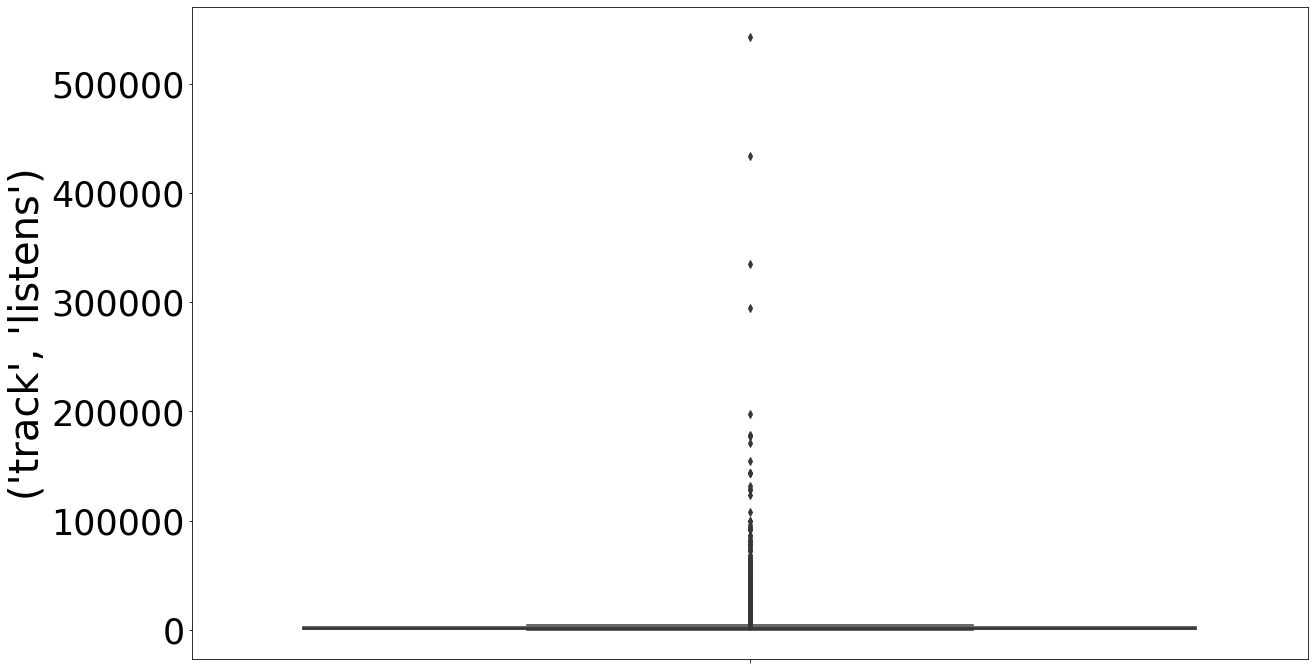

In [12]:
SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))
sns.boxplot(y=('track', 'listens'), data=df, palette="colorblind")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

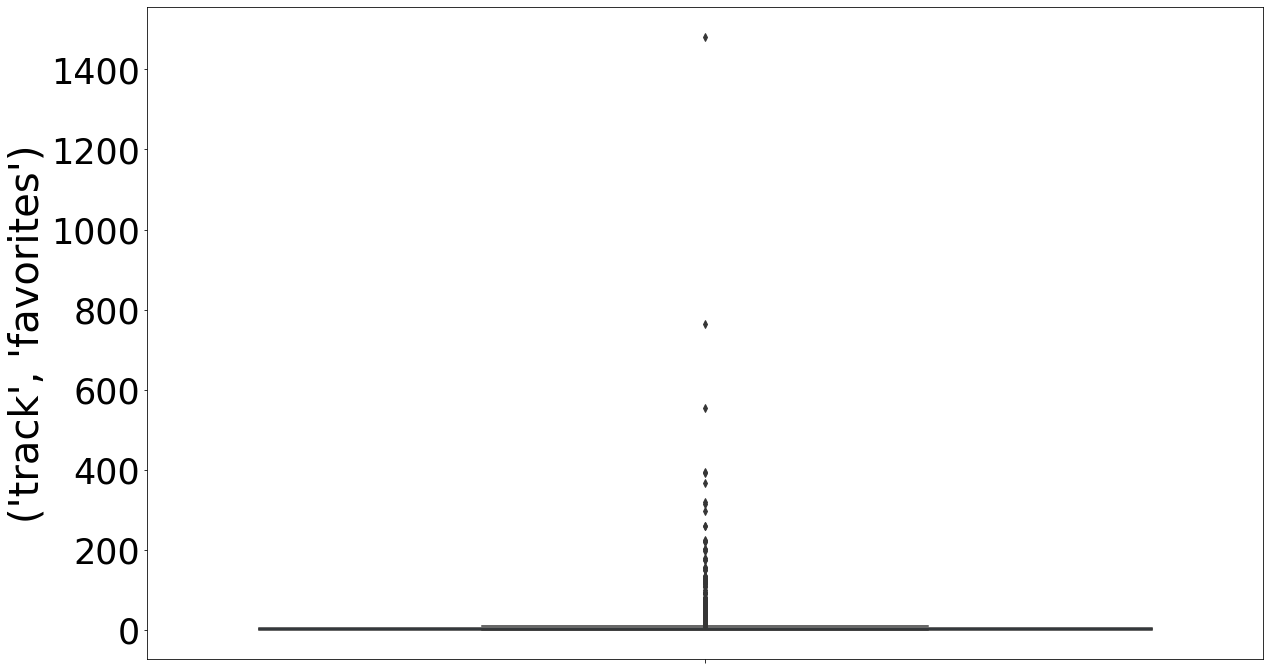

In [13]:
SMALL_SIZE = 30
MEDIUM_SIZE = 40
BIGGER_SIZE = 40

plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=40)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=35)   # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.figure(figsize=(20, 12))
sns.boxplot(y=('track', 'favorites'), data=df, palette="colorblind")
plt.show

In [14]:
Q1 = df[('track', 'listens')].quantile(0.25)
Q3 = df[('track', 'listens')].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df[('track', 'listens')] >= Q1 - 1.5 * IQR) & (df[('track', 'listens')] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  
df

track        
         favorites listens
track_id                  
2                2    1293
3                1     514
5                6    1151
134              3     943
136              0    1498
...            ...     ...
155297           3    1049
155298           0     590
155306           1     435
155307           0     571
155314           0     652

[22347 rows x 2 columns]

C:\Users\Federico\AppData\Local\Temp/ipykernel_3060/2506658720.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr,dtype=np.bool)


(array([0.5, 1.5]),
 [Text(0.5, 0, 'track-favorites'), Text(1.5, 0, 'track-listens')])

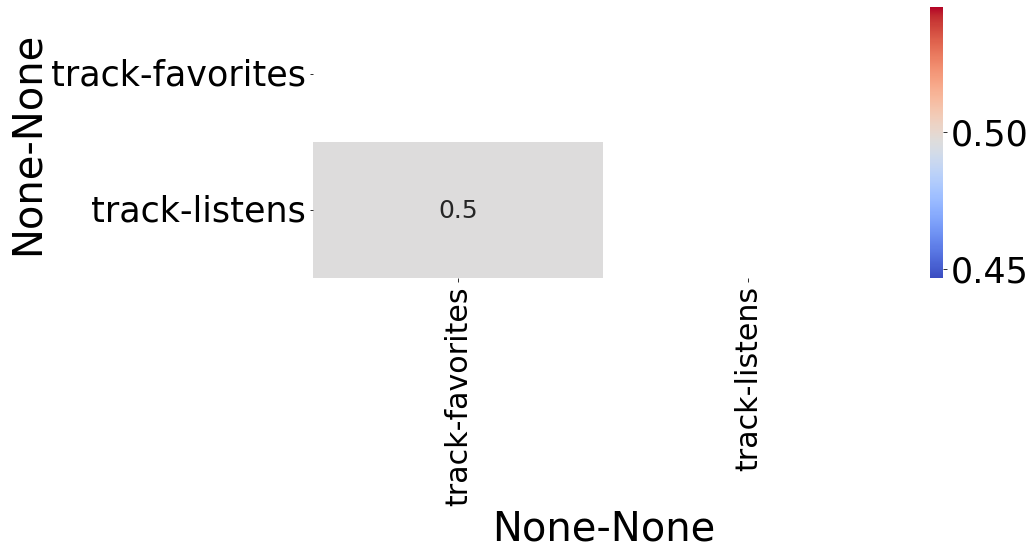

In [15]:
corr=df.corr()
mask=np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr.abs(),annot=True,cmap="coolwarm",mask=mask);
plt.xticks(rotation=90)

In [16]:
Q1 = df[('track', 'favorites')].quantile(0.25)
Q3 = df[('track', 'favorites')].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df[('track', 'favorites')] >= Q1 - 1.5 * IQR) & (df[('track', 'favorites')] <= Q3 + 1.5 *IQR)
df=df.loc[filter]  
df

track        
         favorites listens
track_id                  
2                2    1293
3                1     514
5                6    1151
134              3     943
136              0    1498
...            ...     ...
155297           3    1049
155298           0     590
155306           1     435
155307           0     571
155314           0     652

[21381 rows x 2 columns]

In [17]:
scaler = StandardScaler()
scaler.fit(df)

AAA = scaler.transform(df)
AAA

array([[ 0.17494546,  0.07929791],
       [-0.39455955, -0.78259179],
       [ 2.45296551, -0.07781163],
       ...,
       [-0.39455955, -0.8699978 ],
       [-0.96406456, -0.71952669],
       [-0.96406456, -0.62990786]])

In [18]:
X=AAA[:,0]
X

array([ 0.17494546, -0.39455955,  2.45296551, ..., -0.39455955,
       -0.96406456, -0.96406456])

In [19]:
y=AAA[:,1]
y

array([ 0.07929791, -0.78259179, -0.07781163, ..., -0.8699978 ,
       -0.71952669, -0.62990786])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
X = df[('track', 'listens')].values
y = df[('track', 'favorites')]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
X

array([1293,  514, 1151, ...,  435,  571,  652], dtype=int64)

In [23]:
reg = LinearRegression(normalize=True)
reg.fit(X_train.reshape(-1, 1), y_train)

LinearRegression(normalize=True)

In [24]:
y_pred_train = reg.predict(X_train.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_train, y_pred_train))
print('MSE: %.3f' % mean_squared_error(y_train, y_pred_train))
print('MAE: %.3f' % mean_absolute_error(y_train, y_pred_train))

R2: 0.171
MSE: 2.557
MAE: 1.247


In [25]:
y_pred = reg.predict(X_test.reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.173
MSE: 2.547
MAE: 1.254


In [26]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.00081065]
Intercept: 
 0.7124615575828755


In [27]:
x_values = sorted([v for v in X_test])
y_values = y_pred[np.argsort(X_test)]

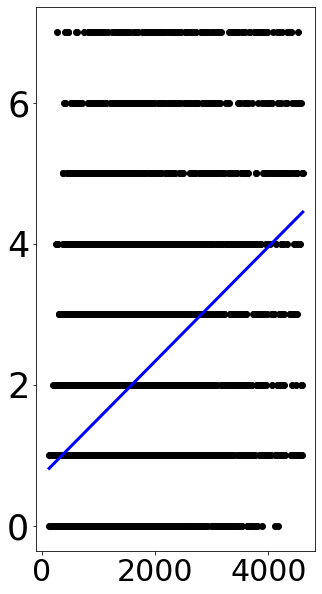

In [30]:
plt.figure(figsize=(5, 10))

plt.scatter(X_test, y_test,  color='black')
plt.plot(x_values, y_values, color='blue', linewidth=3)
plt.show()